In [1]:
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd

# Task 1

In [2]:
def draw_graphs(x, y1, y2=None, y3=None):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y1, linewidth=1, color='#00ff00bb')
    if y2 is not None:
        plt.plot(x, y2, linewidth=1, color='#ff0000aa', linestyle="--")
    if y3 is not None:
        plt.plot(x, y3, linewidth=1, color='#0000ffaa', linestyle="--")

    plt.grid(True, alpha=0.3)

    plt.axhline(y=0, color='black', linewidth=0.5)
    plt.axvline(x=0, color='black', linewidth=0.5)

    plt.xlabel('t', fontsize=12)
    plt.ylabel('f(t)', fontsize=12)

    plt.tight_layout()
    plt.show()

In [3]:
# g(t) function
a = 10.
t1 = 7.
t2 = 15.

def g(t):
    return a if t1<=t<=t2 else 0

In [4]:
# u(t) funcrion
b = .1
c = .1
d = 2

def xi(t):
    return np.random.uniform(-1, 1)

def u(t):
    return g(t) + b*xi(t) + c*np.sin(d*t)

In [5]:
x = np.linspace(1, 100, 1000)

In [6]:
g_vec = np.vectorize(g)(x)
u_vec = np.vectorize(u)(x)

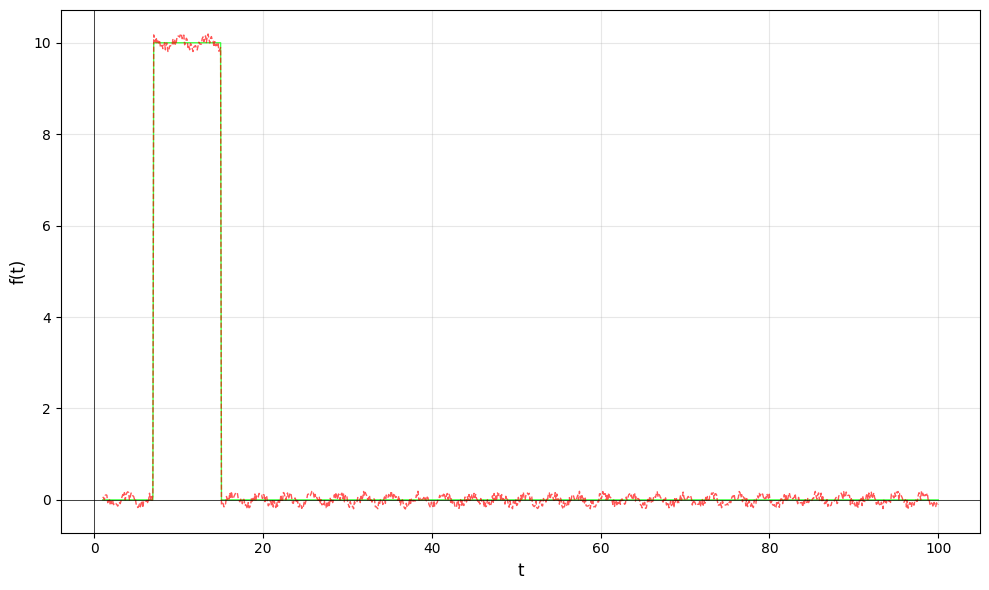

In [7]:
draw_graphs(x, g_vec, u_vec)

## 1.1

In [8]:
c = 0

In [9]:
# set different T (0.01, 0.1, 1, 2)
T = 0.5

In [10]:
# set different a (0.5, 1, 20)
a = 10

In [11]:
# redefine g(t) u(t)

g_vec = np.vectorize(g)(x)
u_vec = np.vectorize(u)(x)

In [12]:
# 1-st order filter
def filter_w1(x, y):
    w1 = sp.signal.TransferFunction([1], [T, 1])
    _, u_w1, _ = sp.signal.lsim(w1, y, x)
    return u_w1

u_w1 = filter_w1(x, u_vec)

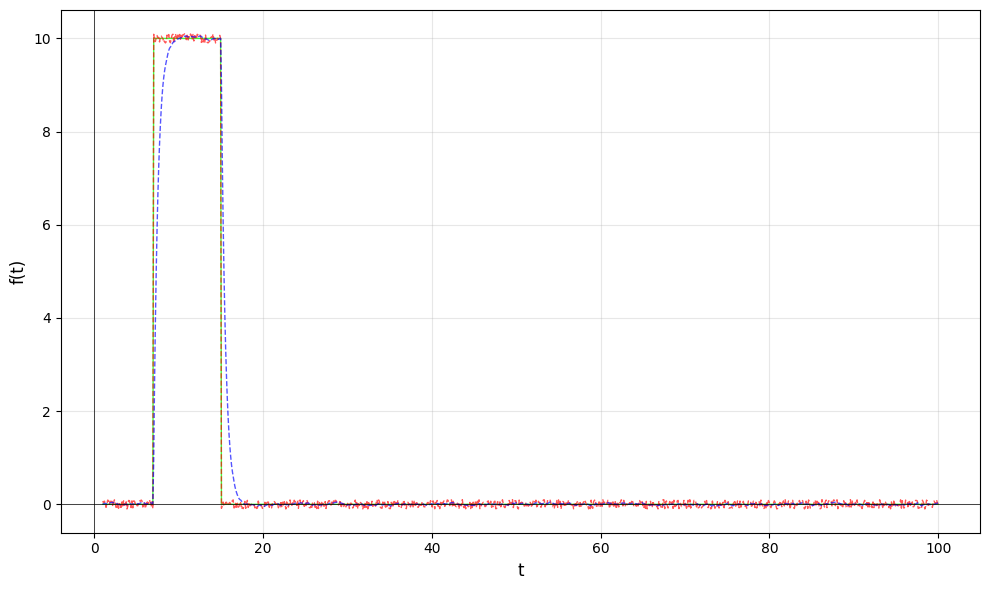

In [13]:
draw_graphs(x, g_vec, u_vec, u_w1)

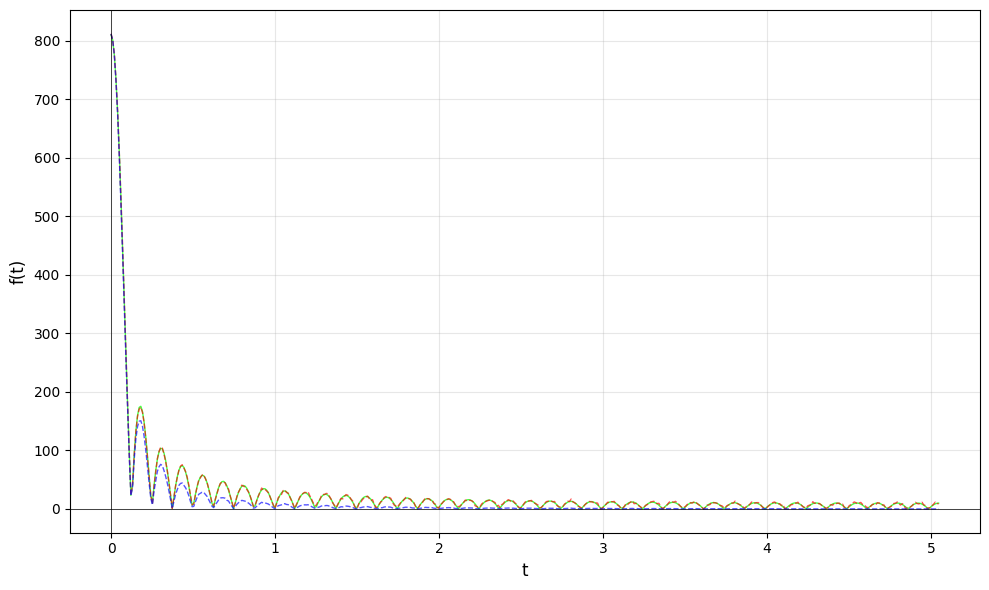

In [14]:
# freq analize
freq = np.fft.rfftfreq(len(x), x[1]-x[0])
g_fft = np.abs(np.fft.rfft(g_vec))
u_fft = np.abs(np.fft.rfft(u_vec))
u_w1_fft = np.abs(np.fft.rfft(u_w1))

draw_graphs(freq, g_fft, u_fft, u_w1_fft)

In [15]:
# frequency response
def draw_freqs(filter):
    w, mag, phaze = sp.signal.bode(filter)
    f_hz = w/(2*np.pi)
    draw_graphs(f_hz, mag)

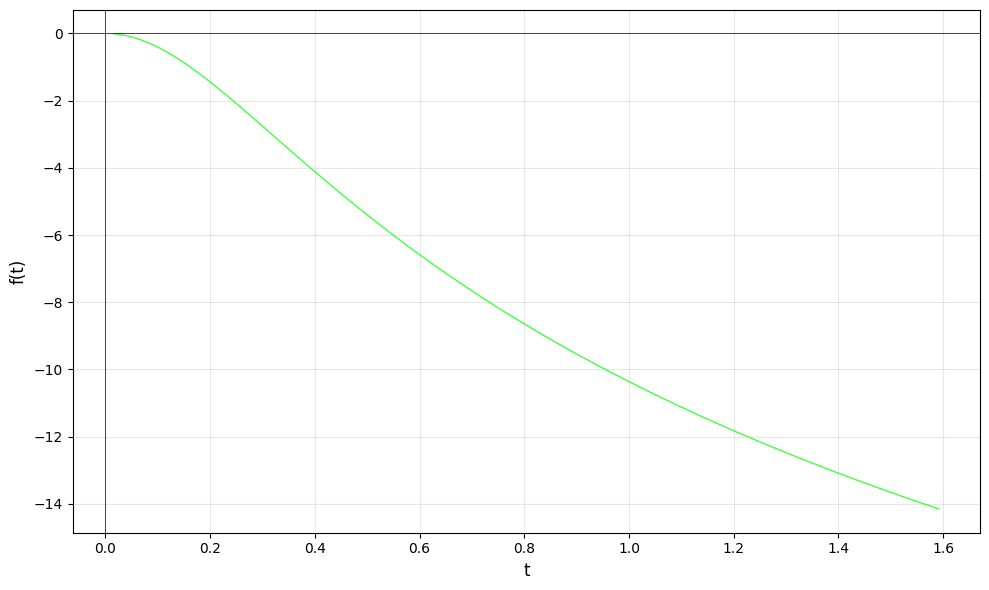

In [16]:
draw_freqs(sp.signal.TransferFunction([1], [T, 1]))

## 1.2

In [17]:
a = 20
b = 0
c = 1
d = 2

In [18]:
g_vec = np.vectorize(g)(x)
u_vec = np.vectorize(u)(x)

In [19]:
a1 = 0
b1 = 2
a2 = b2 = 100

In [20]:
# band-stop filter
def filter_w2(x, y):
    w2 = sp.signal.TransferFunction([1, a1, a2], [1, b1, b2])
    _, u_w2, _ = sp.signal.lsim(w2, y, x)
    return u_w2

u_w2 = filter_w2(x, u_vec)

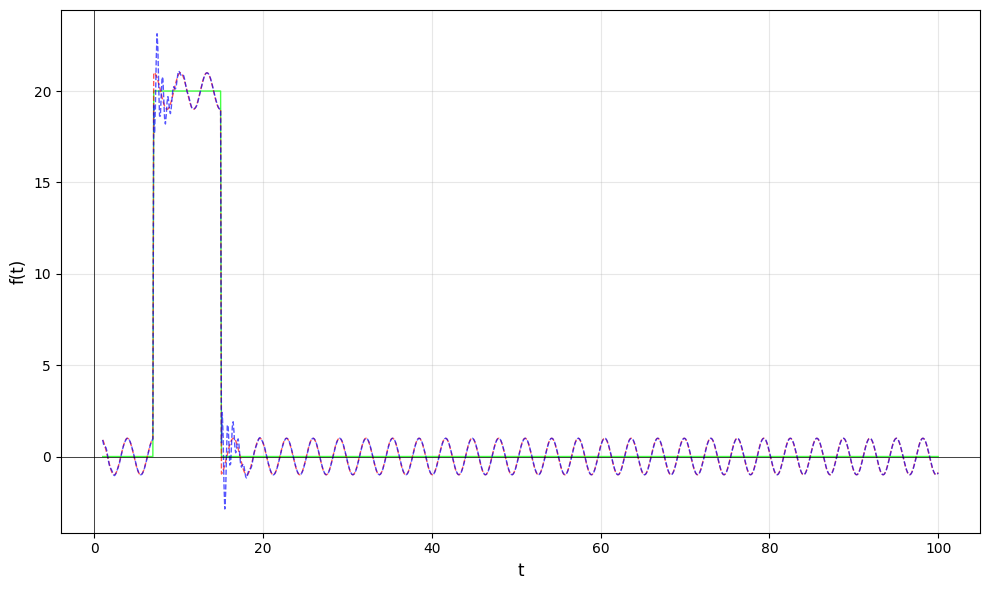

In [21]:
draw_graphs(x, g_vec, u_vec, u_w2)

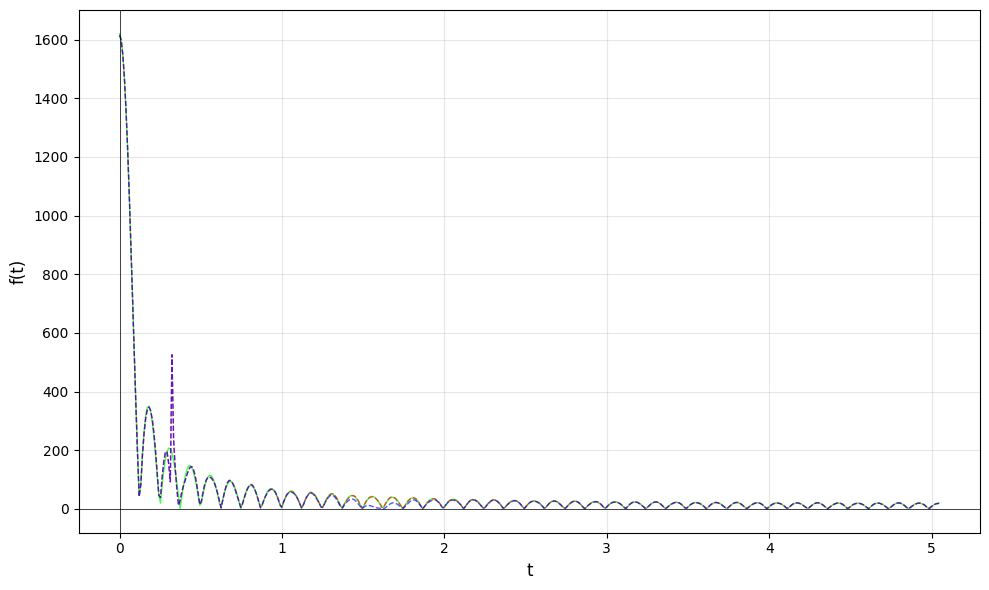

In [22]:
# freq analize
freq = np.fft.rfftfreq(len(x), x[1]-x[0])
g_fft = np.abs(np.fft.rfft(g_vec))
u_fft = np.abs(np.fft.rfft(u_vec))
u_w1_fft = np.abs(np.fft.rfft(u_w2))

draw_graphs(freq, g_fft, u_fft, u_w1_fft)

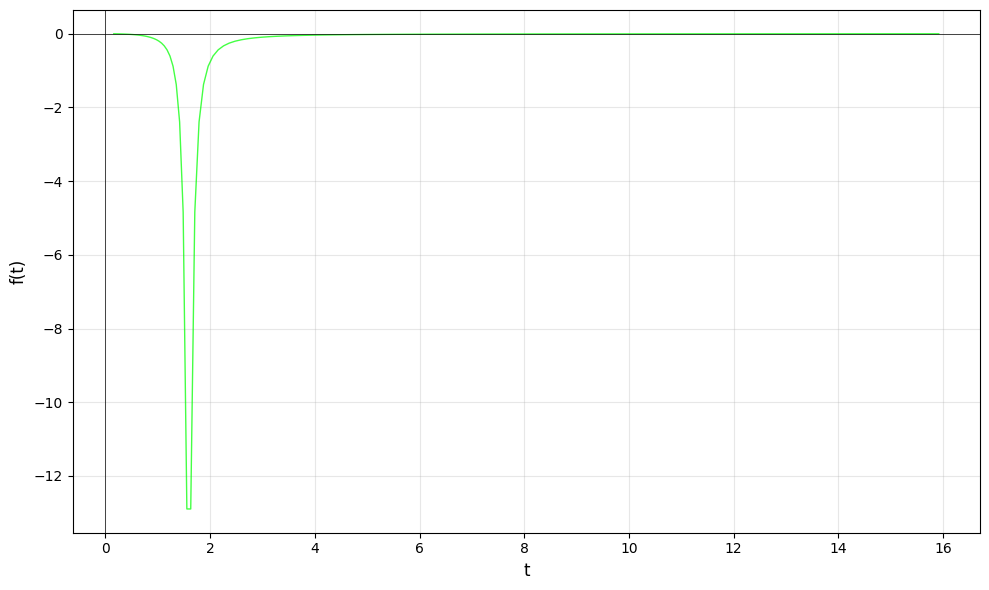

In [23]:
draw_freqs(sp.signal.TransferFunction([1, a1, a2], [1, b1, b2]))

# Task 2

In [24]:
df = pd.read_csv("./sber.csv")
df.head()
sber = df["<CLOSE>"].to_numpy()

In [25]:
x = range(0, len(df))
intervals = {
    1: "#ff0000",
    7: "#00ff00",
    30: "#0000ff",
    91: "#ff00ff",
    365: "#ffff00"
}

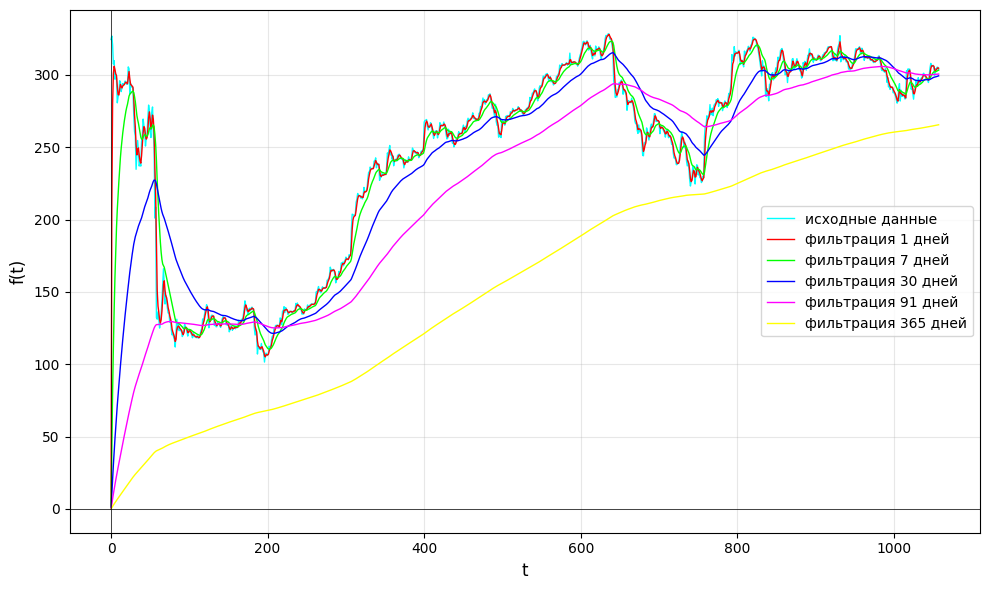

In [26]:
plt.figure(figsize=(10, 6))

plt.plot(x, sber, linewidth=1, color='#00ffff', label='исходные данные')

for i in intervals:
    w1 = sp.signal.TransferFunction([1], [i, 1])
    _, sber_filtered, _ = sp.signal.lsim(w1, sber, x)
    plt.plot(x, sber_filtered, linewidth=1, color=intervals[i], label=f"фильтрация {i} дней")

plt.grid(True, alpha=0.3)

plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)

plt.xlabel('t', fontsize=12)
plt.ylabel('f(t)', fontsize=12)
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()